In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray

In [2]:
IRRADIANCE_1 = [900, 300, 900, 900]
IRRADIANCE_2 = [800, 200, 200, 800]
IRRADIANCE_3 = [100, 200, 300, 600]
TEMPERATURE_1 = 25
TEMPERATURE_2 = 25
TEMPERATURE_3 = 25

pvsyss = ShadedArray.get_default_array()

plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [3]:
class LMPP:
    def __init__(self, lmpps):
        self.voltage = []
        self.current = []
        self.power = []

        for lmpp in lmpps:
            v = lmpp.voltage
            i = lmpp.current
            self.voltage.append(v)
            self.current.append(i)
            self.power.append(v * i)
    

In [36]:
pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=IRRADIANCE_1,
    ambient_temperature=[TEMPERATURE_1, ] * 4,
)
curve_1 = pvsyss.get_shaded_iv_curve(curve_points=180)
power_1 = pvsyss.power(curve_1.voltage, curve_1.current)
mpp_1 = pvsyss.mpp_from_curve(curve_1)
lmpp_1 = ShadedArray.allmpp_from_curve(curve_1)
lmpp_1 = [lmpp for lmpp in lmpp_1 if not lmpp == mpp_1]
lmpp_1 = LMPP(lmpp_1)


pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=IRRADIANCE_2,
    ambient_temperature=[TEMPERATURE_2, ] * 4,
)
curve_2 = pvsyss.get_shaded_iv_curve(curve_points=120)
power_2 = pvsyss.power(curve_2.voltage, curve_2.current)
mpp_2 = pvsyss.mpp_from_curve(curve_2)
lmpp_2 = ShadedArray.allmpp_from_curve(curve_2)
lmpp_2 = [lmpp for lmpp in lmpp_2 if not lmpp == mpp_2]
lmpp_2 = LMPP(lmpp_2)

pvsyss.simulate(
    duty_cycle=0.0,
    irradiance=IRRADIANCE_3,
    ambient_temperature=[TEMPERATURE_3, ] * 4,
)
curve_3 = pvsyss.get_shaded_iv_curve(curve_points=120)
power_3 = pvsyss.power(curve_3.voltage, curve_3.current)
mpp_3 = pvsyss.mpp_from_curve(curve_3)
lmpp_3 = ShadedArray.allmpp_from_curve(curve_3)
lmpp_3 = [lmpp for lmpp in lmpp_3 if not lmpp == mpp_3]
lmpp_3 = LMPP(lmpp_3)


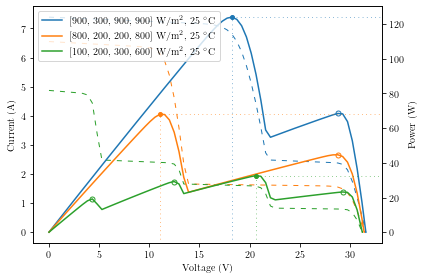

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Current (A)")

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Power (W)")

# Plot I-V curves
# dashes = (line size, space size)
ax.plot(curve_1.voltage, curve_1.current, linestyle='--', dashes=(5, 6), linewidth=1.0, label=f'{IRRADIANCE_1} $\mathrm{{W/m^2}}$, {TEMPERATURE_1} $^\circ \mathrm{{C}}$')
ax.plot(curve_2.voltage, curve_2.current, linestyle='--', dashes=(5, 6), linewidth=1.0, label=f'{IRRADIANCE_2} $\mathrm{{W/m^2}}$, {TEMPERATURE_2} $^\circ \mathrm{{C}}$')
ax.plot(curve_3.voltage, curve_3.current, linestyle='--', dashes=(5, 6), linewidth=1.0, label=f'{IRRADIANCE_3} $\mathrm{{W/m^2}}$, {TEMPERATURE_3} $^\circ \mathrm{{C}}$')

# Plot P-V curves
ax2.plot(curve_1.voltage, power_1, label=f'{IRRADIANCE_1} $\mathrm{{W/m^2}}$, {TEMPERATURE_1} $^\circ \mathrm{{C}}$')
ax2.plot(curve_2.voltage, power_2, label=f'{IRRADIANCE_2} $\mathrm{{W/m^2}}$, {TEMPERATURE_2} $^\circ \mathrm{{C}}$')
ax2.plot(curve_3.voltage, power_3, label=f'{IRRADIANCE_3} $\mathrm{{W/m^2}}$, {TEMPERATURE_3} $^\circ \mathrm{{C}}$')

ax2.set_prop_cycle(None) # Reset color cycle

# Plot MPP
ax2.plot(mpp_1.voltage, mpp_1.voltage * mpp_1.current, 'o', markersize=4)
ax2.plot(mpp_2.voltage, mpp_2.voltage * mpp_2.current, 'o', markersize=4)
ax2.plot(mpp_3.voltage, mpp_3.voltage * mpp_3.current, 'o', markersize=4)

ax2.set_prop_cycle(None)

# Save current limits
xlim = ax.get_xlim()
ylim = ax2.get_ylim()

# Plot lines from MPP to x-axis
ax2.plot([mpp_1.voltage, ] * 2, [-100, mpp_1.voltage * mpp_1.current], linestyle='--', dashes=(1, 5), linewidth=0.7)
ax2.plot([mpp_2.voltage, ] * 2, [-100, mpp_2.voltage * mpp_2.current], linestyle='--', dashes=(1, 5), linewidth=0.7)
ax2.plot([mpp_3.voltage, ] * 2, [-100, mpp_3.voltage * mpp_3.current], linestyle='--', dashes=(1, 5), linewidth=0.7)

ax2.set_prop_cycle(None)

# Plot lines from MPP to y-axis
ax2.plot([mpp_1.voltage, max(curve_1.voltage) * 2], [mpp_1.voltage * mpp_1.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)
ax2.plot([mpp_2.voltage, max(curve_2.voltage) * 2], [mpp_2.voltage * mpp_2.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)
ax2.plot([mpp_3.voltage, max(curve_3.voltage) * 2], [mpp_3.voltage * mpp_3.current, ] * 2, linestyle='--', dashes=(1, 5), linewidth=0.7)

# Restore limits
ax.set_xlim(xlim)
ax2.set_ylim(ylim)

ax2.set_prop_cycle(None)

# Plot LMPP
ax2.plot(lmpp_1.voltage, lmpp_1.power, 'o', markersize=5, markerfacecolor="None")
ax2.plot(lmpp_2.voltage, lmpp_2.power, 'o', markersize=5, markerfacecolor="None")
ax2.plot(lmpp_3.voltage, lmpp_3.power, 'o', markersize=5, markerfacecolor="None")

ax2.legend(loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/fig_03_shaded_pv_curve.pdf', bbox_inches='tight')